In [82]:
import numpy as np
from apprenticheshiplearning.utils.gridworld import plot_gridworld, plot_cost_function, plot_occupation
from apprenticheshiplearning.problems.gridworld import GridWorld
from apprenticheshiplearning.classes.solver import Solver

### Setting

In [83]:
# Parameters
n = 10
wind_intensity = 0.3 # between 0 and 1
gamma = 0.9

In [84]:
grid = np.zeros((n, n))
goal = [                    
        [n-1, n-2], 
        [n-1]
        ]
obstacles = [
                [int(n/2)],
                [i for  i in range(0,int(n/1.2))]
            ]
actions = ["up", "down", "left", "right"]
init_dist = np.ones((n,n)) / n**2


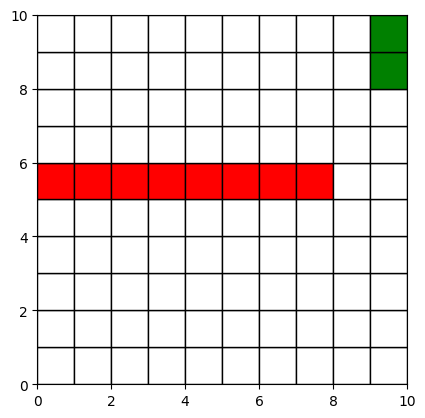

In [85]:
plot_gridworld(grid, obstacles, goal)

In [86]:
def transitions(s1, s , a, goal): #go from s to s1 with action a
    if a == "up":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] != 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] < n - 1:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] + 1:
                return wind_intensity
            else:
                return 0
            
    if a == "down":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] > 0:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] - 1:
                return wind_intensity
            else:
                return 0

    if a == "left":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 1:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 2 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

    if a == "right":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] + 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

def cost(s, a, goal, obstacles):
    r = 1
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 10
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = 0
    return r

In [87]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma, None, cost)
gridworld.get_mdp_forward()
gridworld.mdp_forward.build_T()
solver_expert = Solver(gridworld.mdp_forward, None, None)
prob, expert_occupancy_measure = solver_expert.solve_mdp_forward()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Aug 30 04:36:56 AM: Your problem has 400 variables, 500 constraints, and 0 parameters.
(CVXPY) Aug 30 04:36:56 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 30 04:36:56 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 30 04:36:56 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Aug 30 04:36:56 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 30 04:36:56 AM: Compiling problem (target solver=CLARABEL

In [88]:
eom = expert_occupancy_measure.value
expert_occupancy_measure = np.zeros((n, n, len(actions)))
for i in range(len(eom)):    
    expert_occupancy_measure[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = eom[i]

In [89]:
expert_policy = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        expert_policy[i, j] = np.argmax(expert_occupancy_measure[i, j, :])
expert_policy

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

UP


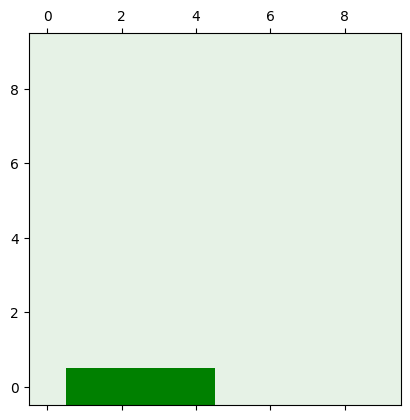

DOWN


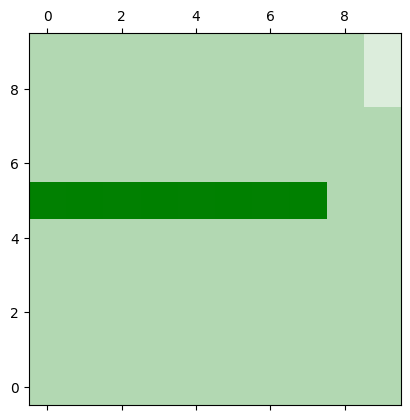

LEFT


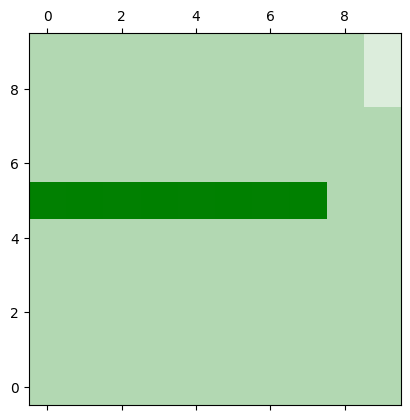

RIGHT


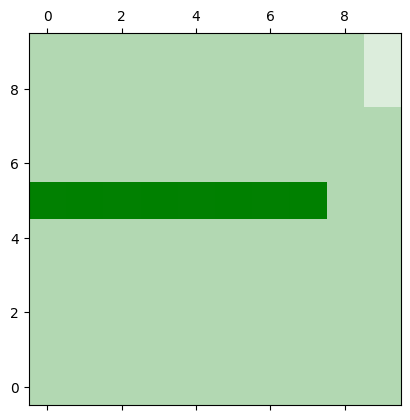

In [90]:
print("UP")
plot_occupation(expert_occupancy_measure[:,:,0])
print("DOWN")
plot_occupation(expert_occupancy_measure[:,:,1])
print("LEFT")
plot_occupation(expert_occupancy_measure[:,:,2])
print("RIGHT")
plot_occupation(expert_occupancy_measure[:,:,3])

In [91]:
c_true = gridworld.mdp_forward.c

### Exploration

In [92]:
def cost_prime(s, a, goal, obstacles):
    r = 10
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 5
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = 0
    return r

In [93]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma, expert_occupancy_measure, cost_prime)
gridworld.get_mdp_IRL()
gridworld.mdp_IRL.build_T()

In [94]:
solver = Solver(gridworld.mdp_IRL, gridworld.c_hat, gridworld.mdp_IRL.mu_e)
prob, c_exp, u_exp = solver.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Aug 30 04:36:57 AM: Your problem has 500 variables, 400 constraints, and 0 parameters.
(CVXPY) Aug 30 04:36:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 30 04:36:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 30 04:36:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Aug 30 04:36:57 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 30 04:36:57 AM: Compiling problem (target solver=CLARABEL

In [95]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c_exp.value)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c_exp.value[i]

UP


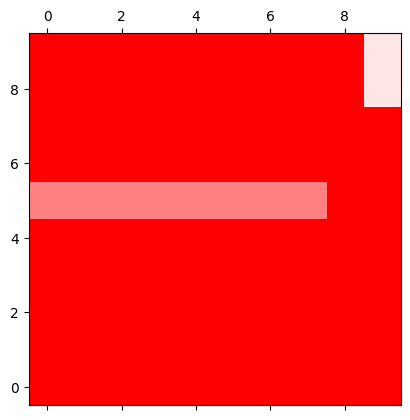

DOWN


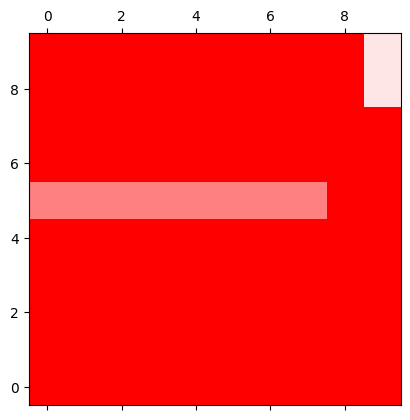

LEFT


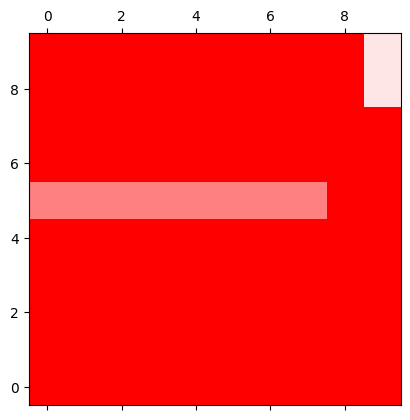

RIGHT


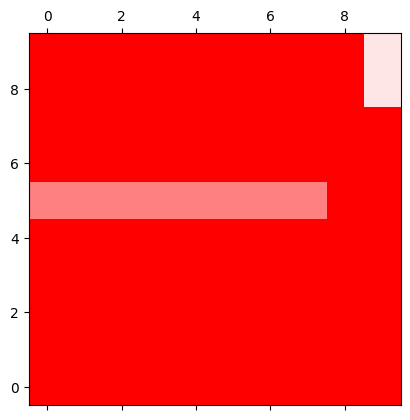

In [96]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

In [97]:
print("Difference between c_exp and c_true")
print(np.linalg.norm(c_exp.value - c_true))

Difference between c_exp and c_true
173.0895720188197


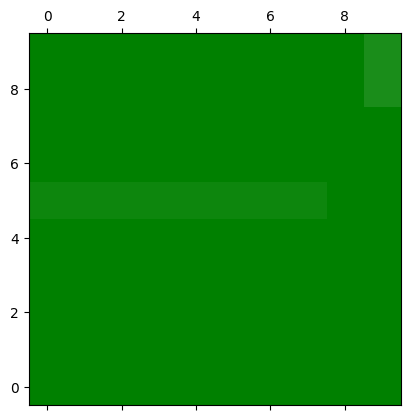

-94.99999183687338


In [98]:
u_reconstructed = np.zeros((n, n))
for i in range(len(u_exp.value)):
    u_reconstructed[gridworld.S_to_grid[i][0], gridworld.S_to_grid[i][1]] = u_exp.value[i]
plot_cost_function(u_reconstructed)
print(u_reconstructed[5,5])

### Inverse Optimization for Cost Function

In [99]:
prob, c_IRL, u_IRL = solver.solve_irl()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Aug 30 04:36:57 AM: Your problem has 500 variables, 401 constraints, and 0 parameters.
(CVXPY) Aug 30 04:36:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 30 04:36:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 30 04:36:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Aug 30 04:36:57 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 30 04:36:57 AM: Compiling problem (target solver=CLARABEL

In [100]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c_IRL.value)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c_IRL.value[i]
u_reconstructed = np.zeros((n, n))
for i in range(len(u_IRL.value)):
    u_reconstructed[gridworld.S_to_grid[i][0], gridworld.S_to_grid[i][1]] = u_IRL.value[i]

UP


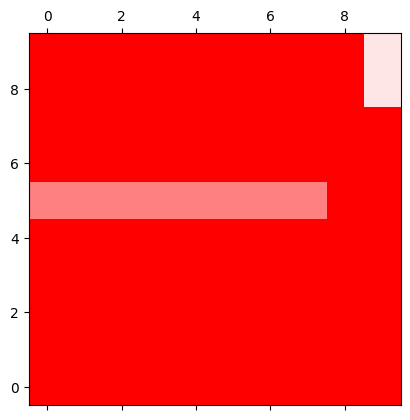

DOWN


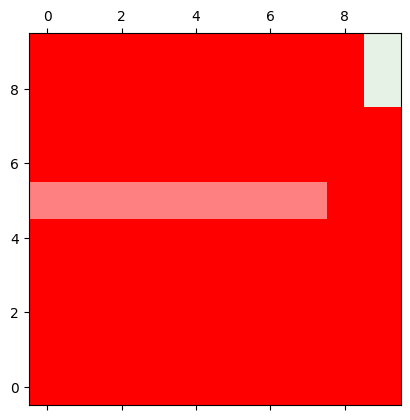

LEFT


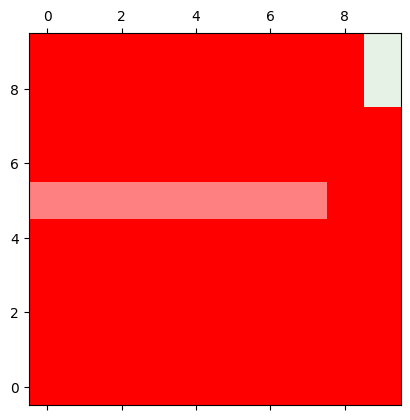

RIGHT


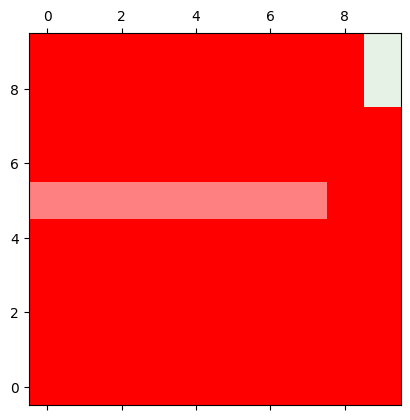

In [101]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

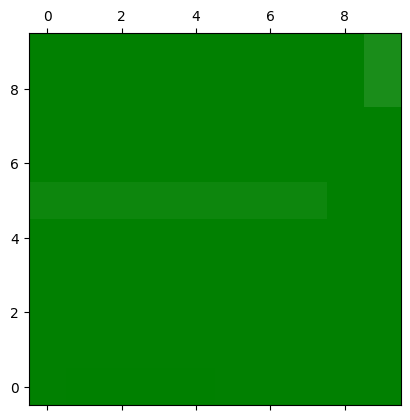

np.float64(-89.99999077766643)

In [102]:
plot_cost_function(u_reconstructed)
u_reconstructed[n-1,n-1]

In [103]:
print("Difference between c_IRL and c_true")
print(np.linalg.norm(c_IRL.value - c_true))

Difference between c_IRL and c_true
173.08957216597278


In [104]:
print("Difference in cost functions learnt")
print(np.linalg.norm(c_IRL.value-c_exp.value))
print("Difference in u learnt")
print(np.linalg.norm(u_IRL.value - u_exp.value))

Difference in cost functions learnt
1.8967806434043201e-06
Difference in u learnt
1.4367950303214056e-05


In [109]:
print("Difference in c_IRL learnt vs c_prime")
print(np.linalg.norm(c_IRL.value-gridworld.c_hat))
print("Difference in c_exp learnt vs c_prime")
print(np.linalg.norm(c_exp.value-gridworld.c_hat))

Difference in c_IRL learnt vs c_prime
2.1219842243322577e-07
Difference in c_exp learnt vs c_prime
2.0514883227843554e-06
